<a href="https://colab.research.google.com/github/vanchanr/intro-to-pytorch/blob/master/5_Training_a_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])

In [6]:
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Processing...
Done!


In [10]:
dataiter = iter(trainloader)
#get first batch containing 64 images
images, labels = dataiter.next()
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


tensor(7)


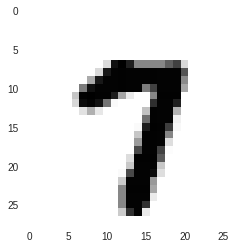

In [11]:
plt.grid(False)
plt.imshow(images[0][0])
print(labels[0])

In [13]:
#flatten images i.e 28x28 image to 1x784 tensor
images = images.view(images.shape[0], -1)
print(images.shape)

torch.Size([64, 784])


In [21]:
#Build a feed forward network
from torch import nn
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64,10))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)


PyTorch provides various loss functions through nn module. One of them is nn.CrossEntropyLoss() typically used in classification problems.

---

> Note1: **nn.CrossEntropyLoss** needs raw outputs from our network called scores or logits as inputs and not the outputs from  softmax as it combines **nn.LogSoftmax()**  and **nn.NLLLoss()** (negative log likelihood loss) in a single class.


> Note2: Due to Python Floating Point Arithmetic issues([link](https://docs.python.org/3/tutorial/floatingpoint.html)), they cannot accurately represent values near 0 or 1. So it is **not** recommended to work with probabilities. So to work with log-proabilities, LogSoftmax() is used instead of Softmax(). To get actual probabilities, just do `torch.exp(output)` for output from LogSoftmax()




---





In [22]:
#define a loss function
criterion = nn.CrossEntropyLoss()

#Forward pass and get the logits
logits = model(images)

#calculate loss with logits and labels
loss = criterion(logits, labels)
print(loss)

tensor(2.2992, grad_fn=<NllLossBackward>)


In [24]:
model2 = nn.Sequential(nn.Linear(784, 128),
                       nn.ReLU(),
                       nn.Linear(128, 64),
                       nn.ReLU(),
                       nn.Linear(64, 10),
                       nn.LogSoftmax(dim=1))
criterion2 = nn.NLLLoss()

#Forward pass and get the logits
logps = model2(images)

#calculate loss with logits and labels
loss2 = criterion2(logps, labels)
print(loss2)

tensor(2.2934, grad_fn=<NllLossBackward>)
